### Importando as bibliotecas necessárias para a análise

In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

### Agora, importando o dataframe a ser utilizado para o treinamento

In [3]:
df = pd.read_csv("dataset/card_transdata.csv")

### Vamos ver algumas coisas sobre o Dataframe

In [4]:
formato = df.shape
tamanho = df.size


print("O dataframe possui",formato[0],"linhas e",formato[1],'colunas')
print("Tamanho do dataframe:",tamanho)


O dataframe possui 1000000 linhas e 8 colunas
Tamanho do dataframe: 8000000


Podemos ver que ele tem 1000000 (1 milhão) de instâncias e colunas.

Durante a escolha desse dataframe vi a discussão de que ele possívelmente é simulado, mas acredito que o treinamento possa ser feito ainda sim.

### Vamos ver agora, quais colunas ele possui e algumas informações sobre ela

In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


De fato ele possui 1 milhão de instâncias, seguinto o dícionário disponibilizado no slide da Aula 2 do professor:

count: Número de elementos

mean: Média

std: Desvio Padrão

min: Menor valor

25%: Primeiro quartil

50%: Mediana

75%: Terceiro quartil

max: Maior valor

### Descrição sobre os valores das colunas

Como no Kaggle, lugar de onde se originou esse dataset, há a descrição das colunas, vou colocar aqui a tradução livre:

*Distance_from_home*: A distância entre o lugar da compra e a casa do comprador (Unidades de medidas desconhecidas)

*Distance_from_last_transaction*: A distância entre o lugar da compra e o lugar de compra anterior (Unidades de medidas desconhecidas, provavelmente a mesma da anterior)

*Ratio_to_median_purchase_price*: Razão entre o preço da transação e a média dos valores das compras do comprador (Provavelmente, unidades absolutas $/$)

*Repeat_retailer*: Se a compra aconteceu com o mesmo vendedor (0 em caso negativo ou 1 em caso positivo)

*Used_chip*: Se a transação aconteceu usando chip(cartão de crédito) (0 em caso negativo ou 1 em caso positivo)

*Use_pin_number*: Se a transação ocorreu usando senha (0 em caso negativo ou 1 em caso positivo)

*Online_order*: Se a transação foi uma transação online (0 em caso negativo ou 1 em caso positivo)

*fraud*: Se a transação foi uma fraude (0 em caso negativo ou 1 em caso positivo / 0 não foi fraude, 1 foi fraude)

### Como a média de operações fraudulentas é 0.087403 , devemos esperar 87403 operações fraudulentas, vamos ver se isso é verdade

In [6]:
count = df['fraud'].value_counts()
print(count)

0.0    912597
1.0     87403
Name: fraud, dtype: int64


De fato, isso se confirmou

### Um pouco da análise da distância das transações

In [7]:
count = df['distance_from_home'].value_counts()
print(count)

57.877857     1
17.696734     1
47.933214     1
48.300681     1
25.414372     1
             ..
145.704144    1
4.501861      1
17.443799     1
3.583736      1
58.108125     1
Name: distance_from_home, Length: 1000000, dtype: int64


Parecem ter muitas distâncias separadas, vamos ver

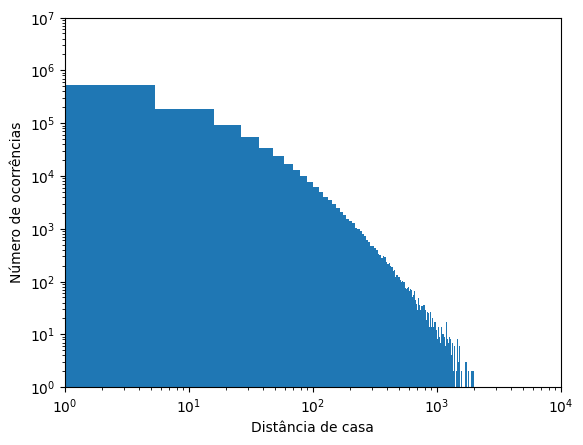

In [16]:
plt.hist(df['distance_from_home'],align='left',bins = 1000)
plt.yscale('log')
plt.ylim(1,1e7)
plt.xscale('log')
plt.xlim(1,10000)
plt.xlabel('Distância de casa')
plt.ylabel('Número de ocorrências')
plt.show()

A grande maioria parece ter sido perto de casa